In [2]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import pickle

import sys
import os
sys.path.append('..')

import horus as ho

In [3]:
from simsopt.configs import get_w7x_data

In [4]:
w7x = get_w7x_data()

In [5]:
from simsopt.field import Current

In [6]:
# GYM00+1750
currents = [Current(1.109484) * 1e6 for _ in range(5)]
currents.append(Current(-0.3661) * 1e6)
currents.append(Current(-0.3661) * 1e6)

# # 
# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

# currents = [Current(1.109484) * 1e6 for _ in range(5)]
# currents.append(Current(-0.3661) * 1e6)
# currents.append(Current(-0.3661) * 1e6)

In [7]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.stellarator(w7x[0], currents, w7x[2], nfp=5, surface_radius=2)

#### Plot the current difference

In [ ]:
curr_diff = []
for actual, base in zip(currents,  w7x[1]):
    print(base.current, " | ", actual.current_to_scale.current * 1e6)
    curr_diff.append(actual.current_to_scale.current * 1e6 - base.current)

In [ ]:
curr_diff

In [ ]:
cmap = plt.colormaps['RdBu']
norm = plt.Normalize(min(curr_diff), max(curr_diff))
colors = cmap(norm(curr_diff))
colors = colors[:, :3]

In [ ]:
def rep(data):
            if close:
                return np.concatenate((data, [data[0]]))
            else:
                return data

In [ ]:
# Assuming curr_diff is a list of differences in currents
# Normalize curr_diff to the range [0, 1] for coloring

# Plot the coils
for i, coil in enumerate(coils):
    c


mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

In [ ]:
from mayavi import mlab
for i, coil in enumerate(coils):
    coil.plot(engine="mayavi", show=False, color=tuple(colors[i%7]))

# get the current lut manager
mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

#### Poincare

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [ ]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 1
Rs = np.linspace(6.05, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

nfieldlines = 2
p1 = np.array([5.6144507858315915, -0.8067790944375764])
p2 = np.array([5.78, -0.6])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
Rs, Zs = np.meshgrid(Rs, Zs)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

RZs = np.concatenate((RZs, RZs2))

In [ ]:
ax.plot(RZs[:, 0], RZs[:, 1], '+')
fig

In [ ]:
tys, phis = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10, plot=False)

In [ ]:
_, _, fig, ax = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [ ]:
for col in ax[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
fig

In [ ]:
# import pickle
# pickle.dump(fig, open("../output/poincare_GYM000+1750_chaotic_black.pickle", "wb"))

#### Finding fix-point

In [8]:
fig = pickle.load(open("../output/W7X_GYM000-1750_poincare_black.pkl", "rb"))
ax = fig.get_axes()[0]
plt.show()

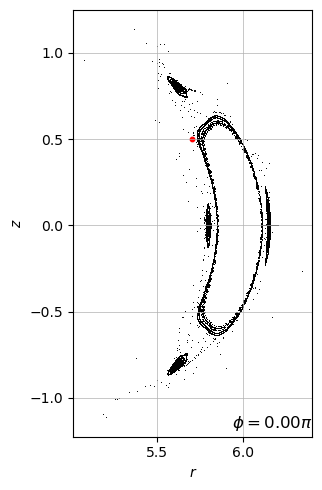

In [9]:
# guess = [5.6, 0.8] # O point
guess = [5.7, 0.5] # X point
# guess = [5.78, -0.6]
ax.scatter(guess[0], guess[1], c='r', s=10)
fig

In [10]:
from pyoculus.solvers import FixedPoint
ps = ho.SimsoptBfieldProblem(ma.gamma()[0, 0], 0, 5, bs)

In [ ]:
gamma = ho.trace(bs, 40*2*np.pi, [5.72, 0, 0.68], tol=1e-9)

In [ ]:
from mayavi import mlab
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))

mlab.show()

In [11]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-9

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp = FixedPoint(ps, pparams, integrator_params=iparams)
fp.compute(guess=guess, pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)

In [12]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]

In [13]:
results

[[5.699569970135461, 0.0, 0.5256033542654256],
 [5.699569969647767, 0.0, -0.5256033556619757],
 [5.883462106305232, 0.0, -0.6556749688478208],
 [5.8834621048332, 0.0, 0.6556749704511491],
 [5.699569970135464, 0.0, 0.5256033542654209]]

In [14]:
fp_list = [FixedPoint(ps, pparams, integrator_params=iparams) for _ in range(4)]
for i, fpi in enumerate(fp_list):
    guessi = [results[i][0], results[i][2]]
    fpi.compute(guess=guessi, pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)
    print(i, fpi.x[0], fpi.y[0], fpi.z[0])

0 5.699569970135461 0.0 0.5256033542654256
1 5.699569969647767 0.0 -0.5256033556619757
2 5.883462106305232 0.0 -0.6556749688478208
3 5.8834621048332 0.0 0.6556749704511491


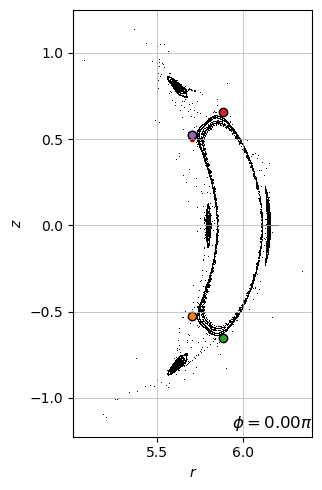

In [15]:
for rr in results:
    ax.scatter(rr[0], rr[2], marker="o", edgecolors="black", linewidths=1)
fig

#### Tracing stable and unstable manifolds

In [16]:
from scipy.integrate import solve_ivp

In [198]:
from pyoculus.solvers import BaseSolver
from pyoculus.solvers import FixedPoint
from pyoculus.problems import BfieldProblem, CartesianBfield
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, newton_krylov
import numpy as np
from numba import jit

class Manifold(BaseSolver):
    def __init__(self, fixedpoint, bfield, params=dict(), integrator=None, integrator_params=dict()):
        
        # Check that the fixed point is a correct FixedPoint instance
        assert isinstance(fixedpoint, FixedPoint), "Fixed point must be an instance of FixedPoint class"
        assert fixedpoint.successful, "Need a successful fixed point to compute the manifold"

        self.fixedpoint = fixedpoint

        # Compute the eigenvalues and eigenvectors of the fixed point
        eigRes = fixedpoint.compute_eig()
        eigenvalues = eigRes[0]
        # Eigenvectors are stored as columns of the matrix eigRes[1], transposing it to access them as np.array[i]
        eigenvectors = eigRes[1].T
        s_index, u_index = 0, 1
        if eigenvalues[0].real > eigenvalues[1].real:
            s_index, u_index = 1, 0

        self.vector_u = eigenvectors[u_index]
        self.lambda_u = eigenvalues[u_index]
        self.vector_s = eigenvectors[s_index]
        self.lambda_s = eigenvalues[s_index]

        # Check that the bfield is a correct BfieldProblem instance
        assert isinstance(bfield, BfieldProblem), "Bfield must be an instance of BfieldProblem class"
        self.bfield = bfield

        # Integrator and BaseSolver initialization
        integrator_params["ode"] = bfield.f_tangent

        # Setting the needed parameters
        if "solve_ivp" not in params:
            params["solve_ivp"] = True

        self._start_config_params = {
            "phi": 0,
            "integrate_ivp_kwargs": {
                "atol": 1e-22, "rtol": 3e-14, "nintersect": 1, "method": "DOP853"
            },
        }
        self._start_config_params.update({key: value for key, value in params.items() if key in self._start_config_params})

        params = {key: value for key, value in params.items() if key not in self._start_config_params}

        self.unstable = {'+': None, '-': None}
        self.stable = {'+': None, '-': None}

        super().__init__(
            problem=bfield,
            params=params,
            integrator=integrator,
            integrator_params=integrator_params,
        )

    def compute(self, **kwargs):
        if self._params["solve_ivp"] == True:
            return self.compute_ivp(**kwargs)
        else:
            pass

    def compute_ivp(self, **kwargs):
        options = {
            "eps_guess": 2e-6,
            "nintersect": 10,
            "atol": 1e-20,
            "rtol": 1e-10,
            "neps": 2,
            "directions": "u+u-s+s-"
        }
        options.update({key: value for key, value in kwargs.items() if key in options})
        
        rz_fixedpoint = np.array([self.fixedpoint.x[0], self.fixedpoint.z[0]])

        # epsilon = self.find_epsilon(options['eps_guess'], self.vector_u)
        epsilon = options['eps_guess']
        
        RZs = self.start_config(epsilon, self.vector_u, options['neps'])[0]

        if 'u+' in options['directions']:
            print("Computing unstable manifold with postive epsilon...")
            self.unstable['+'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'])

        if 'u-' in options['directions']:
            print("Computing unstable manifold with negative epsilon...")
            RZs  = 2*rz_fixedpoint - RZs
            self.unstable['-'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'])
        
        RZs = self.start_config(epsilon, self.vector_s, options['neps'], -1)[0]
        if 's+' in options['directions']:
            print("Computing stable manifold with positive epsilon...")
            self.stable['+'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'], direction=-1)
        
        if 's-' in options['directions']:
            print("Computing stable manifold with negative epsilon...")
            RZs = 2*rz_fixedpoint - RZs
            self.stable['-'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'], direction=-1)


    def start_config(self, epsilon, eigenvector, neps=10, direction=1):
        options = self._start_config_params
        options['integrate_ivp_kwargs']['direction'] = direction

        rEps = np.array([self.fixedpoint.x[0], self.fixedpoint.z[0]]) + epsilon * eigenvector
        out = self.integrate_ivp(np.atleast_2d(rEps), [options['phi']], **options['integrate_ivp_kwargs'])
        
        eps_dir = out.y[:,1]-out.y[:,0]
        eps_dir = eps_dir / np.linalg.norm(eps_dir)
        
        # print(epsilon, eps_dir, eigenvector, np.dot(eps_dir, eigenvector) - 1)

        Rs = np.linspace(out.y[0,0], out.y[0,1], neps, endpoint=False)
        Zs = np.linspace(out.y[1,0], out.y[1,1], neps, endpoint=False)
        RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

        return RZs, np.abs(np.dot(eps_dir, eigenvector)) - 1
    

    def find_epsilon(self, eps_guess, eigenvector, iter = 4):
        find_eps = lambda x: self.start_config(x, eigenvector, 1)[1]

        # eps_root = fsolve(find_eps, eps_guess, xtol=options['xtol'])
        try:
            eps_root = newton_krylov(find_eps, eps_guess, inner_maxiter=iter)[0]
            print(f"Newton-Krylov succeeded, epsilon = {eps_root}")
        except:
            print("Newton-Krylov failed, using the guess for epsilon.")
            return eps_guess

        return eps_root

    def integrate_ivp(self, RZstart, phis, **kwargs):
        options = {
            "rtol": 1e-7,
            "atol": 1e-8,
            "nintersect": 10,
            "method": "DOP853",
            "direction": 1,
        }
        options.update(kwargs)

        assert RZstart.shape[1] == 2, "RZstart must be a 2D array with shape (n, 2)"
        assert len(phis) > 0, "phis must be a list of floats with at least one element"
        assert isinstance(options["nintersect"], int) and options["nintersect"] > 0, "nintersect must be a positive integer"
        assert options["direction"] in [-1, 1], "direction must be either -1 or 1"

        def Bfield_2D(t, rzs):
            rzs = rzs.reshape((-1, 2))
            phis = options['direction']*(t % (2 * np.pi)) * np.ones(rzs.shape[0])
            bs_Bs = self.bfield.B_many(rzs[:, 0]*np.cos(phis), rzs[:, 0]*np.sin(phis), rzs[:, 1])

            # Transform the B field to cylindrical coordinates
            rphizs = np.array([rzs[:, 0], phis, rzs[:, 1]]).T
            Bs = np.empty_like(bs_Bs)
            for i, (position, B) in enumerate(zip(rphizs, bs_Bs)):
                Bs[i, :] = (CartesianBfield._inv_Jacobian(*position) @ B.reshape(3, -1)).reshape(-1)

            # Check if the field goes back in phi and set it to NaN
            is_perturbed = (Bs[:,1] > 1e-24) + (rzs[:, 0] < 1e-22)
            
            if t == 0 or True:
                print(rzs)
                print(Bs)
                print(np.sign(Bs[:, 1]))
                print(t, is_perturbed.sum())
            Bs[is_perturbed, :] = np.array([0, 1, 0])

            Bs = np.vstack((Bs[:, 0]/Bs[:, 1], Bs[:, 0]/Bs[:, 1]))
            return options['direction']*Bs.flatten()
        
        # setup the phis of the poincare sections
        phis = np.unique(np.mod(phis, 2 * np.pi / self.bfield.Nfp))
        phis.sort()

        # setup the evaluation points for those sections
        phi_evals = np.array(
            [
                phis + self.fixedpoint.qq * 2 * np.pi * i / self.bfield.Nfp
                for i in range(options["nintersect"] + 1)
            ]
        )

        out = solve_ivp(
            Bfield_2D,
            [0, phi_evals[-1, -1]],
            RZstart.flatten(),
            t_eval=phi_evals.flatten(),
            method=options["method"],
            atol=options["atol"],
            rtol=options["rtol"],
        )

        return out

In [199]:
manif_list = [Manifold(fpt, ps) for fpt in fp_list]

Fixed point is unstable spiral, positiive real parts and complex conjugate pair
Fixed point is unstable spiral, positiive real parts and complex conjugate pair
Fixed point is unstable spiral, positiive real parts and complex conjugate pair
Fixed point is unstable spiral, positiive real parts and complex conjugate pair


In [ ]:
# manif.integrate_ivp(np.array([[5.7, 0.5]]), [0], nintersect=1, atol=1e-22, rtol=1e-10, direction=-1)
# manif.integrate_ivp(np.array([[5.699e+00, 5.170e-01]]), [0], nintersect=1, atol=1e-22, rtol=1e-10, direction=1)

In [200]:
manif_list[1].compute(nintersect = 40, neps = 15, directions="s-", atol=1e-15, rtol=1e-13, eps_guess=2e-6)

[[ 5.6995709  -0.52560158]]
[[-0.47723885 -0.30572439 -0.39776866]]
[-1.]
0.0 0
[[ 5.70697262 -0.51819986]]
[[-0.46511467 -0.30602293 -0.41190216]]
[-1.]
0.00474162417277196 0
[[ 5.70026337 -0.52490911]]
[[-0.47613594 -0.30575549 -0.39911008]]
[-1.]
0.00044360846752158754 0
[[ 5.70060773 -0.52456475]]
[[-0.47558411 -0.30577093 -0.39977795]]
[-1.]
0.0006654127012823813 0
[[ 5.70112474 -0.52404774]]
[[-0.47475275 -0.30579375 -0.40077832]]
[-1.]
0.000998119051923572 0
[[ 5.70325476 -0.52191771]]
[[-0.47128399 -0.30588505 -0.40488862]]
[-1.]
0.002375319624598305 0
[[ 5.70392552 -0.52124696]]
[[-0.47017718 -0.30591289 -0.40617918]]
[-1.]
0.002811198897101564 0
[[ 5.70284321 -0.52232927]]
[[-0.47195967 -0.30586775 -0.40409585]]
[-1.]
0.002108399172826173 0
[[ 5.70359295 -0.52157953]]
[[-0.47072681 -0.30589914 -0.40553954]]
[-1.]
0.0025949528280937518 0
[[ 5.7080156  -0.51715688]]
[[-0.46327927 -0.30607336 -0.41400776]]
[-1.]
0.0054926501527984405 0
[[ 5.70736015 -0.51781233]]
[[-0.4644018  -

KeyboardInterrupt: 

In [ ]:
for human in manif_list:
    human.compute(nintersect = 15, neps = 10)

In [31]:
manif_list[1].compute(nintersect = 40, neps = 15, directions="u-", atol=1e-22, rtol=1e-10, eps_guess=2e-6)
manif_list[2].compute(nintersect = 20, neps = 20, directions="s-", atol=1e-22, rtol=3e-14, eps_guess=2e-6)

c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\optimize\_nonlin.py:368: RuntimeWarning: invalid value encountered in scalar divide
  and dx_norm/self.x_rtol <= x_norm))


Newton-Krylov failed, using the guess for epsilon.
Computing unstable manifold with negative epsilon...
Newton-Krylov failed, using the guess for epsilon.
Computing stable manifold with negative epsilon...


c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\integrate\_ivp\rk.py:505: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  super().__init__(fun, t0, y0, t_bound, max_step, rtol, atol,


In [32]:
fig = pickle.load(open("../output/W7X_GYM000-1750_poincare_chaotic_black.pkl", "rb"))
ax = fig.get_axes()[0]

In [33]:
color = ['red', 'blue', 'green', 'purple']
marker = ['o', 'x', '+', 's']

for k, manif in enumerate([manif_list[1], manif_list[2]]):
    for i, out in enumerate([
                            manif.unstable['+'], 
                            manif.unstable['-'], 
                            manif.stable['+'],
                            manif.stable['-']
                            ]):
        if out is not None:
            for yy in out.y.T:
                yy = yy.reshape(-1, 2)
                ax.plot(yy[:, 0], yy[:, 1], marker=marker[k], markersize=4, c=color[i], alpha=0.5)

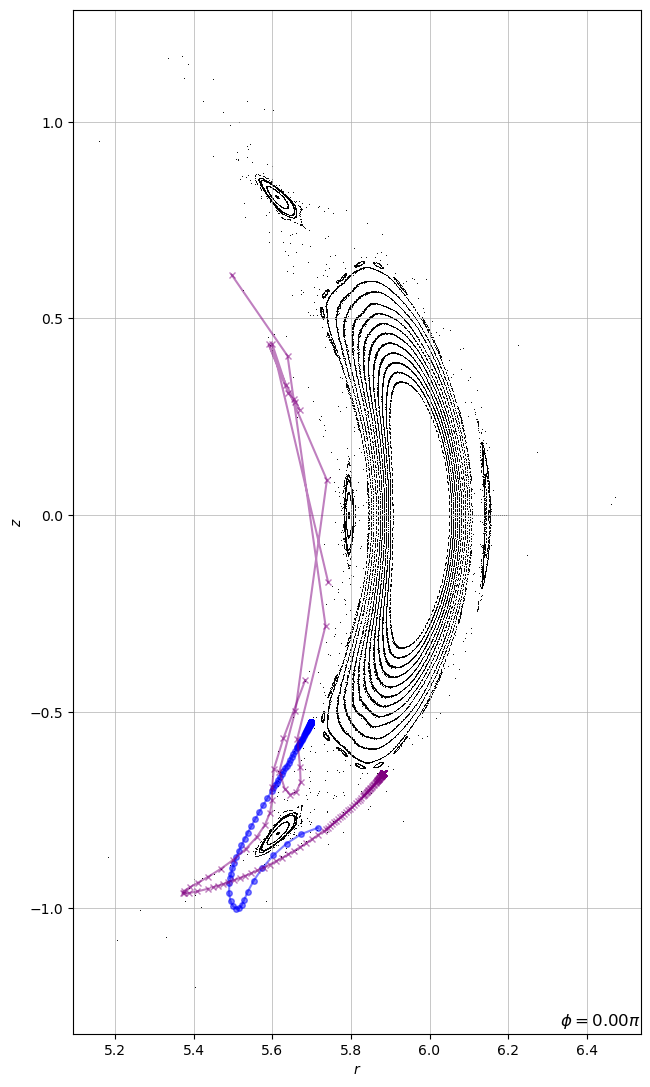

In [35]:
# ax.set_xlim(5.5, 6)
# ax.set_ylim(0.2, 1)

fig.set_size_inches(12, 12)
fig

In [44]:
manif_list[2].stable['-'].y.shape

(40, 15)

In [ ]:
M = fp_list[0].jacobian

In [ ]:
eigRes = np.linalg.eig(M)
print(eigRes)

In [ ]:
lambda_u = eigRes.eigenvalues[0]
lambda_v = eigRes.eigenvalues[1]

print(lambda_u, lambda_v)

In [ ]:
u = eigRes.eigenvectors[:,0]
v = eigRes.eigenvectors[:,1]

u = u / np.linalg.norm(u)
v = v / np.linalg.norm(v)

print(u, v)

In [ ]:
eps_lower = 2.04293982e-06
rEps = np.array([fp_list[0].x[0], fp_list[0].z[0]]) + eps_lower * v
print(rEps)

In [ ]:
out = ho.poincare_ivp_2d(bs, np.atleast_2d(rEps), [0], nintersect=1, mpol=4, nfp=5, atol = 1e-22, rtol = 3e-14)

In [ ]:
out.y

In [ ]:
eps_dir = out.y[:,1]-out.y[:,0]
print(eps_dir)
eps_dir = eps_dir / np.linalg.norm(eps_dir)
print(eps_dir)

In [ ]:
# eps = np.atleast_2d(np.linspace(1e-12, 1e-8, 100)).T
# rX = (np.array([fp.x[0], fp.z[0]], ndmin=2).T @ np.ones((1, eps.shape[0]))).T
# RZs = rX + (eps @ np.atleast_2d(v))

In [ ]:
neps = 80
Rs = np.linspace(out.y[0,0], out.y[0,1], neps, endpoint=False)
Zs = np.linspace(out.y[1,0], out.y[1,1], neps, endpoint=False)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

In [ ]:
out = ho.poincare_ivp_2d(bs, RZs, [0], nintersect=20, mpol=4, nfp=5, atol = 1e-12)

In [ ]:
fig = pickle.load(open("../output/W7X_GYM000-1750_poincare_chaotic_black.pkl", "rb"))
ax = fig.get_axes()[0]

In [ ]:
for yy in out.y.T:
    yy = yy.reshape(-1, 2)
    ax.scatter(yy[:, 0], yy[:, 1], marker=".", s=4, c="orange")

# plt.xlim(1.2, 1.8)
# plt.ylim(-0.7, 0.7)

In [ ]:
# ax.set_xlim(5.5, 5.8)
# ax.set_ylim(-0.6, -0.1)
# ax.set_xlim(5.85, 5.9)
# ax.set_ylim(0.65, 0.7)

fig

In [ ]:
ax.set_xlim(5.87, 5.89)
ax.set_ylim(0.64, 0.67)

fig

In [ ]:
pickle.dump(fig, open("../output/W7X_GYM000+1750_tangle.pkl", "wb"))

In [ ]:
fig = pickle.load(open("../output/poincare_GYM000-1750_14032024_1051.pkl", "rb"))
ax = fig.get_axes()[0]

In [ ]:
ax.set_xlim(5.5, 6.2)
ax.set_ylim(0.48, 0.7)
fig